## Load


In [41]:
import pickle
import pathlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from datetime import datetime, timedelta
from tqdm import tqdm

from dasQt.Process.advanced_tools.decomposition import (
                fk_filter, curvelet_windowing)

plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 16
})
from dasQt.das import DAS
from dasQt.utools.show import setAxis, A4Save
from dasQt.utools.math import smooth2a

In [ ]:
files = pathlib.Path('/Volumes/CSIM_LAB/DATA/DAS/YuLin-2024-11-30/YuLin_DAS2')
# files = pathlib.Path('/Users/zhangzhiyu/Desktop/bus_selected')
das = DAS()

das.openFolder(foldername=files)
das.par['fIndex'] = 36
das.par['scale'] = 200.
das.par['colormap'] = 'rainbow'
# das.readData(files / das.par['fnames'][das.par['fIndex']])


for _ in range(36, len(das.par['fnames']), 10):
    data_list = []
    for _ in range(10):
        das.readNextData()
        das.cutData(xmin=100, xmax=580)

        dx = das.meta['dx']
        dt = das.meta['dt']
        data = das.data
        
        data_list.append(data)

    data = np.vstack(data_list)
    nt, nx = data.shape
    fs = int(1/dt)
    das.meta['nt'], das.meta['nx'] = nt, nx
    das.data = data

    fig, ax = plt.subplots(figsize=(16, 8))
    d_min = np.nanmin(data)
    d_max = np.nanmax(data)
    ax.imshow(data.T, aspect='auto', cmap=das.par['colormap'], origin='lower',
                extent=[0, data.shape[0]*dt, das.par['xmin'], das.par['xmax']],
                vmin=d_min/das.par['scale'], vmax=d_max/das.par['scale'])
    
    A4Save(fig, f'figs/{das.par["fnames"][das.par["fIndex"]]}.png')
    plt.close()
    # plt.show()
    # break


In [78]:
files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241015_gau2m/2024-10-15')
# files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241016_gau2m/2024-10-16')
# files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241017_gau2m/2024-10-17')
das = DAS()

das.openFolder(foldername=files)
das.par['fIndex'] = 100
das.par['scale'] = 200.
das.par['colormap'] = 'rainbow'
# das.readData(files / das.par['fnames'][das.par['fIndex']])

Pxx_avgNfs = []
Pxx_avgNxs = []
Pxxs = []
for ii in tqdm(range(60, len(das.par['fnames']), 5)):        # len(das.par['fnames'])
    das.par['fIndex'] = ii
    das.readNextData()
    das.cutData(xmin=100, xmax=900)

    dx = das.meta['dx']
    dt = das.meta['dt']
    data = das.data
    
    # data_list.append(data)
    f, Pxx = signal.welch(data.T, int(1/dt), nperseg=8192)  # data(nt, nx)
    # Pxx = signal.savgol_filter(Pxx, 15, 3)
    Pxxs.append(Pxx)
    if _ % 10 == 0:
        Pxx_avgNxNf   = np.mean(Pxxs, axis=0)
        Pxx_avgNf     = np.mean(Pxx_avgNxNf, axis=0)
        Pxx_avgNx     = np.mean(Pxx_avgNxNf, axis=1)
        std_Pxx_avgNf = np.std(Pxx_avgNxNf, axis=0)
        std_Pxx_avgNx = np.std(Pxx_avgNxNf, axis=1)

        Pxx_avgNfs.append(Pxx_avgNf)
        Pxx_avgNxs.append(Pxx_avgNx)

        Pxxs = []



2024-12-07 14:17:38,906 INFO	das: 163	2024-10-15-08-01-00-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:17:38,910 INFO	das: 163	Cut Data Done!
2024-12-07 14:17:43,306 INFO	das: 163	2024-10-15-08-06-00-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:17:43,309 INFO	das: 163	Cut Data Done!
2024-12-07 14:17:47,132 INFO	das: 163	2024-10-15-08-11-00-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:17:47,134 INFO	das: 163	Cut Data Done!
2024-12-07 14:17:50,544 INFO	das: 163	2024-10-15-08-16-00-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:17:50,545 INFO	das: 163	Cut Data Done!
2024-12-07 14:17:53,845 INFO	das: 163	2024-10-15-08-21-00-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:17:53,847 INFO	das: 163	

In [84]:
Pxx_avgNxs = np.array(Pxx_avgNxs)
Pxx_avgNfs = np.array(Pxx_avgNfs)
print(Pxx_avgNxs.shape, Pxx_avgNfs.shape)



fig, ax = plt.subplots(1, 2, figsize=(16, 8))
scale = 0.05
d_min = np.min(Pxx_avgNfs)
d_max = np.max(Pxx_avgNfs)  
ax[0].imshow(Pxx_avgNfs.T, aspect='auto', origin='lower', cmap='jet', vmin=scale*d_min, vmax=scale*d_max)

scale = 0.05
d_min = np.min(Pxx_avgNxs)
d_max = np.max(Pxx_avgNxs)
ax[1].imshow(Pxx_avgNxs.T, aspect='auto', origin='lower', cmap='jet', vmin=scale*d_min, vmax=scale*d_max)   # yes

A4Save(fig, f'figs/Pxx_{files.stem}.png')
A4Save(fig, f'figs/Pxx_{files.stem}.pdf')
plt.close()



(148, 783) (148, 4097)


In [76]:
# files = pathlib.Path('/Volumes/CSIM_LAB/DATA/DAS/YuLin-2024-11-30/YuLin_DAS2')
# files = pathlib.Path('/Users/zhangzhiyu/Desktop/bus_selected')
files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241015_gau2m/2024-10-15')
# files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241016_gau2m/2024-10-16')
# files = pathlib.Path('/Volumes/SanDisk4T/ShenZhen-2024-10-14/20241017_gau2m/2024-10-17')


das = DAS()

das.openFolder(foldername=files)
das.par['fIndex'] = 10
das.par['scale'] = 200.
das.par['colormap'] = 'rainbow'
# das.readData(files / das.par['fnames'][das.par['fIndex']])

Pxx_avgNfs = []
Pxx_avgNxs = []
Pxxs = []
for ii in tqdm(range(10, len(das.par['fnames']), 5)):        # len(das.par['fnames'])
    das.par['fIndex'] = ii
    das.readNextData()
    das.cutData(xmin=100, xmax=900)

    dx = das.meta['dx']
    dt = das.meta['dt']
    data = das.data
    
    # data_list.append(data)
    # f, Pxx = signal.welch(data.T, int(1/dt), nperseg=8192)  # data(nt, nx)
    # Pxx = signal.savgol_filter(Pxx, 15, 3)
    Pxx = np.mean(np.abs(data), axis=0)
    Pxx_avgNxs.append(Pxx)
    # if _ % 60 == 0:
    #     Pxx_avgNxNf   = np.mean(Pxxs, axis=0)
    #     Pxx_avgNf     = np.mean(Pxx_avgNxNf, axis=0)
    #     Pxx_avgNx     = np.mean(Pxx_avgNxNf, axis=1)
    #     std_Pxx_avgNf = np.std(Pxx_avgNxNf, axis=0)
    #     std_Pxx_avgNx = np.std(Pxx_avgNxNf, axis=1)

    #     Pxx_avgNfs.append(Pxx_avgNf)
    #     Pxx_avgNxs.append(Pxx_avgNx)

    #     Pxxs = []



  0%|          | 0/158 [00:00<?, ?it/s]2024-12-07 14:09:21,408 INFO	das: 163	2024-10-15-07-10-58-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:09:21,415 INFO	das: 163	Cut Data Done!
  1%|          | 1/158 [00:00<02:09,  1.22it/s]2024-12-07 14:09:22,490 INFO	das: 163	2024-10-15-07-15-58-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:09:22,492 INFO	das: 163	Cut Data Done!
  1%|▏         | 2/158 [00:01<02:25,  1.07it/s]2024-12-07 14:09:23,367 INFO	das: 163	2024-10-15-07-20-58-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:09:23,372 INFO	das: 163	Cut Data Done!
  2%|▏         | 3/158 [00:02<02:20,  1.10it/s]2024-12-07 14:09:24,117 INFO	das: 163	2024-10-15-07-25-58-out T: 60.0s,                 nx: 1047, fs: 2000Hz,                 dx: 1.02m, gauge: 2.04m
2024-12-07 14:09:24,117 INFO	das: 163	Cut Data Done!
  3%|▎  

In [77]:
Pxx_avgNxs = np.array(Pxx_avgNxs)
print(Pxx_avgNxs.shape)

scale = 0.2
d_min = np.min(Pxx_avgNxs)
d_max = np.max(Pxx_avgNxs)
# smooth2a(Pxx_avgNxs, 2, 2)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.imshow(Pxx_avgNxs, aspect='auto', origin='lower', cmap='jet', vmin=scale*d_min, vmax=scale*d_max)
A4Save(fig, f'figs/{files.stem}.png')
A4Save(fig, f'figs/{files.stem}.pdf')
plt.close()



(158, 783)


(10, 240) (10, 4097)


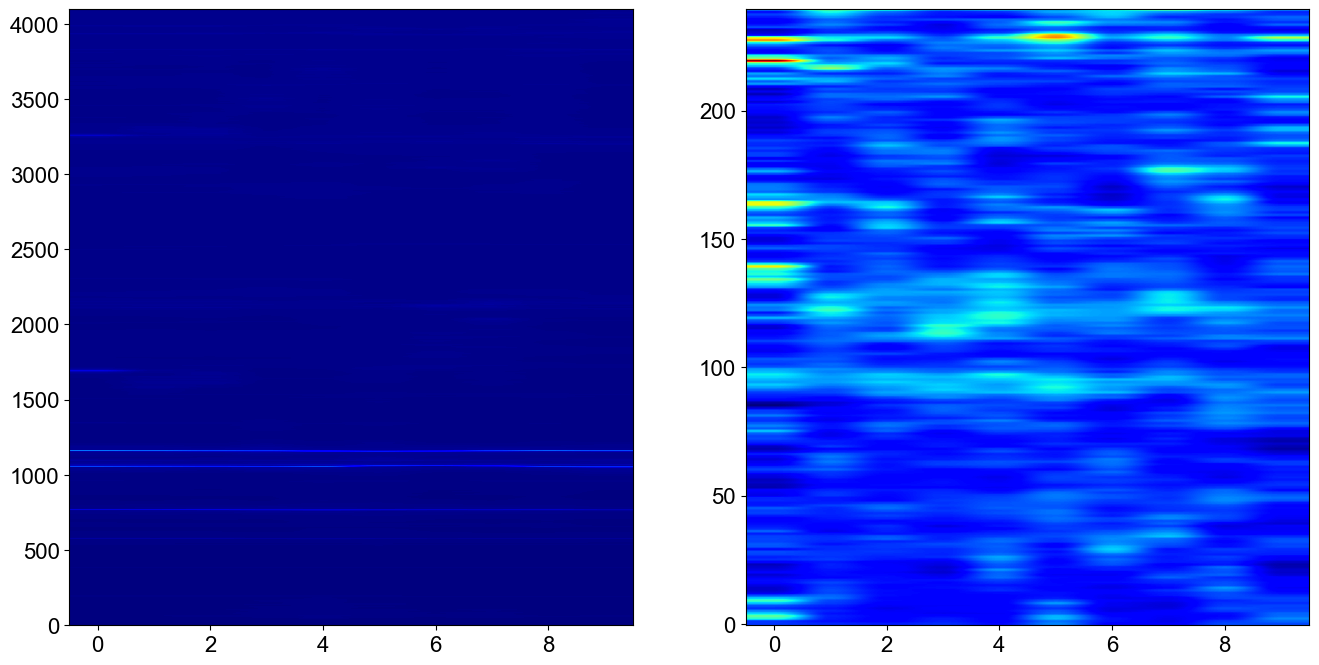

In [ ]:
files = pathlib.Path('/Volumes/CSIM_LAB/DATA/DAS/YuLin-2024-11-30/YuLin_DAS2')
# files = pathlib.Path('/Users/zhangzhiyu/Desktop/bus_selected')
das = DAS()

das.openFolder(foldername=files)
das.par['fIndex'] = 36
das.par['scale'] = 200.
das.par['colormap'] = 'rainbow'
# das.readData(files / das.par['fnames'][das.par['fIndex']])

Pxx_avgNfs = []
Pxx_avgNxs = []
for _ in range(36, 100, 10):        # len(das.par['fnames'])
    Pxxs = []
    data_list = []
    for _ in range(10):
        das.readNextData()
        das.cutData(xmin=100, xmax=580)

        dx = das.meta['dx']
        dt = das.meta['dt']
        data = das.data
        
        # data_list.append(data)
        f, Pxx = signal.welch(data.T, int(1/dt), nperseg=8192)  # data(nt, nx)
        # Pxx = signal.savgol_filter(Pxx, 15, 3)
        Pxxs.append(Pxx)

    Pxx_avgNxNf   = np.mean(Pxxs, axis=0)
    Pxx_avgNf     = np.mean(Pxx_avgNxNf, axis=0)
    Pxx_avgNx     = np.mean(Pxx_avgNxNf, axis=1)
    std_Pxx_avgNf = np.std(Pxx_avgNxNf, axis=0)
    std_Pxx_avgNx = np.std(Pxx_avgNxNf, axis=1)

    Pxx_avgNfs.append(Pxx_avgNf)
    Pxx_avgNxs.append(Pxx_avgNx)



In [25]:
# from pathlib import Path
# import numpy as np
from joblib import Parallel, delayed
# from scipy import signal

# # Assuming you have a DAS class as before
# das = DAS()

# Instead of using readNextData(), first open the folder and get the filenames
files = pathlib.Path('/Volumes/CSIM_LAB/DATA/DAS/YuLin-2024-11-30/YuLin_DAS2')
das.openFolder(foldername=files)
das.par['fIndex'] = 36
das.par['scale'] = 200.
das.par['colormap'] = 'rainbow'

# Extract all filenames from das.par['fnames']
all_fnames = das.par['fnames']  # This should be a list of filenames
# We'll process from index 36 to 100 stepping by 10 sets, each set containing 10 files
# i.e., chunks: [36..45], [46..55], [56..65], etc.

# Function to process a chunk of 10 files
def process_data_chunk(das_folder, file_list, xmin=100, xmax=580):
    # Create a new DAS instance to avoid shared state (if needed)
    das_local = DAS()
    das_local.openFolder(foldername=das_folder)
    # Overwrite parameters if necessary
    das_local.par['scale'] = 200.
    das_local.par['colormap'] = 'rainbow'
    
    # We need to explicitly read files by name here instead of readNextData
    # So let's just do das_local.readData on each file.
    # NOTE: You might need to set metadata properly if DAS assumes sequential reading
    # If das.readData(file) works independently, use that.

    Pxxs = []
    for fname in file_list:
        das_local.readData(das_folder / fname)
        # Cut data
        das_local.cutData(xmin=xmin, xmax=xmax)

        data = das_local.data
        dx = das_local.meta['dx']
        dt = das_local.meta['dt']

        f, Pxx = signal.welch(data.T, int(1/dt), nperseg=8192)
        Pxxs.append(Pxx)

    Pxx_avgNxNf = np.mean(Pxxs, axis=0)
    Pxx_avgNf = np.mean(Pxx_avgNxNf, axis=0)
    Pxx_avgNx = np.mean(Pxx_avgNxNf, axis=1)
    return Pxx_avgNf, Pxx_avgNx

# Prepare chunks of filenames
start_indices = range(36, 100, 10)  # 36, 46, 56, ...
chunk_size = 10
chunks = [all_fnames[i:i+chunk_size] for i in start_indices]

# Run in parallel
results = Parallel(n_jobs=-1)(delayed(process_data_chunk)(files, chunk) for chunk in chunks)

# Unpack the results
Pxx_avgNfs = [res[0] for res in results]
Pxx_avgNxs = [res[1] for res in results]

# Now you have Pxx_avgNfs and Pxx_avgNxs computed in parallel


    version     :  1.1.0
    author      :  Zhiyu Zhang
    instruction :  JiLin University
    date        :  2024-05-05 20h
    email       :  erbiaoger@gmail.com
    site        :  erbiaoger.site

    version     :  1.1.0
    author      :  Zhiyu Zhang
    instruction :  JiLin University
    date        :  2024-05-05 20h
    email       :  erbiaoger@gmail.com
    site        :  erbiaoger.site

    version     :  1.1.0
    author      :  Zhiyu Zhang
    instruction :  JiLin University
    date        :  2024-05-05 20h
    email       :  erbiaoger@gmail.com
    site        :  erbiaoger.site

    version     :  1.1.0
    author      :  Zhiyu Zhang
    instruction :  JiLin University
    date        :  2024-05-05 20h
    email       :  erbiaoger@gmail.com
    site        :  erbiaoger.site

    version     :  1.1.0
    author      :  Zhiyu Zhang
    instruction :  JiLin University
    date        :  2024-05-05 20h
    email       :  erbiaoger@gmail.com
    site        :  erbiaoger.site


2024-12-06 23:30:37,397 INFO	das: 163	SR_DS_2024-12-02_12-15-37_UTC T: 1.0s,                 nx: 600, fs: 1000Hz,                 dx: 1.00m, gauge: 4.00m
2024-12-06 23:30:37,398 INFO	das: 163	Cut Data Done!
/Users/zhangzhiyu/miniconda3/envs/dasQt/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:589: UserWarning: nperseg = 8192 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
2024-12-06 23:30:50,440 INFO	das: 163	SR_DS_2024-12-02_12-44-38_UTC T: 60.0s,                 nx: 300, fs: 1000Hz,                 dx: 2.00m, gauge: 10.00m
2024-12-06 23:30:50,442 INFO	das: 163	Cut Data Done!
2024-12-06 23:30:51,501 INFO	das: 163	SR_DS_2024-12-02_12-54-38_UTC T: 60.0s,                 nx: 300, fs: 1000Hz,                 dx: 2.00m, gauge: 10.00m
2024-12-06 23:30:51,502 INFO	das: 163	Cut Data Done!
2024-12-06 23:30:54,750 INFO	das: 163	SR_DS_2024-12-02_12-24-38_UTC T: 60.0s,                 nx: 300, fs: 1000Hz

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

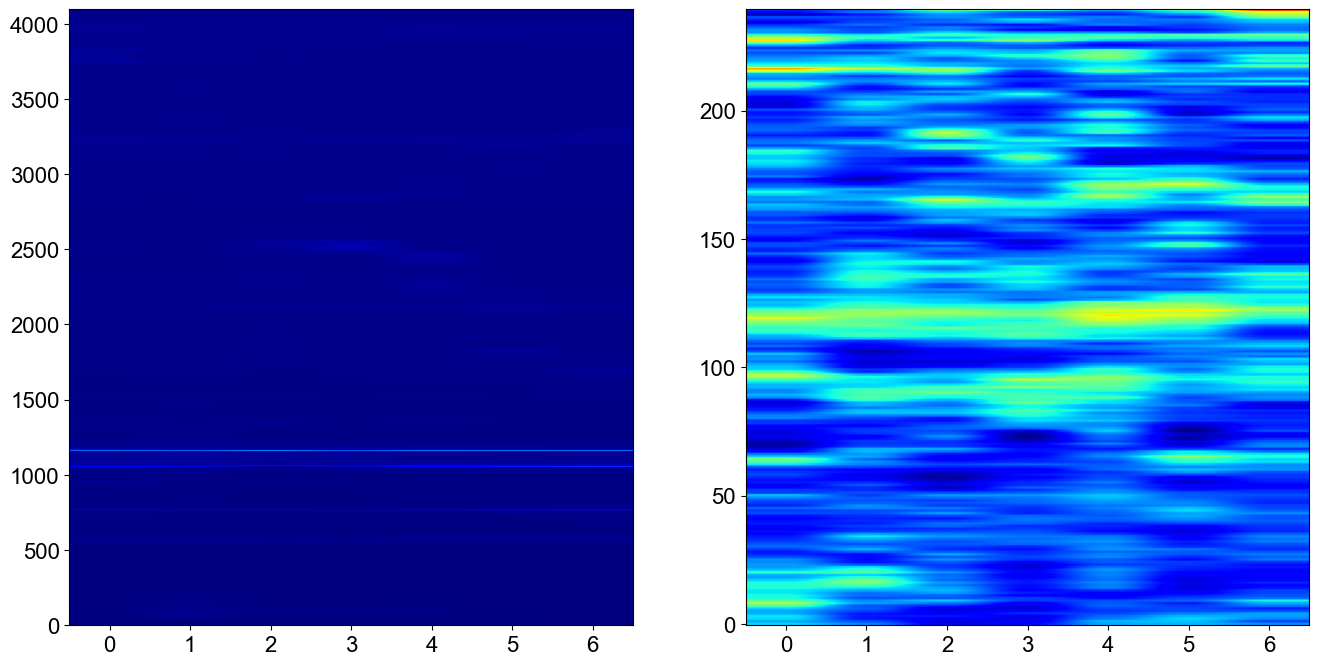

In [18]:
for i in data_list:
    print(i.shape)

(60000, 480)
(60000, 480)
(1000, 480)
(60000, 240)
(60000, 240)
(60000, 240)
(60000, 240)
(60000, 240)
(60000, 240)
(60000, 240)


In [5]:
# from dasQt.Process.basic_tools.preprocessing import (
#                 demeaning, detrending, normalization, stacking, downsampling,
#                 trimming)
# data1 = demeaning(data.T).T                             # demeaning
# data2 = detrending(data.T).T                            # detrending
# data3 = normalization(data.T).T                         # normalization
# data4 = stacking(data.T, N=3, step=1, average=True).T   # stacking in x
# data5 = downsampling(data.T, xint=1, tint=10, stack=True, filter=True).T                  # downsampling
# data6 = trimming(data.T, dx=dx, fs=fs, xmin=100, xmax=580, tmin=0, tmax=None, mode=1).T  # cut data


## Freq

In [4]:
from dasQt.Process.basic_tools.freqattributes import (
                spectrum, spectrogram, fk_transform)

(65537,) (65537,) (4328555.109304733-5638416.207474288j) (-3027566.227684363+2303218.458482142j)


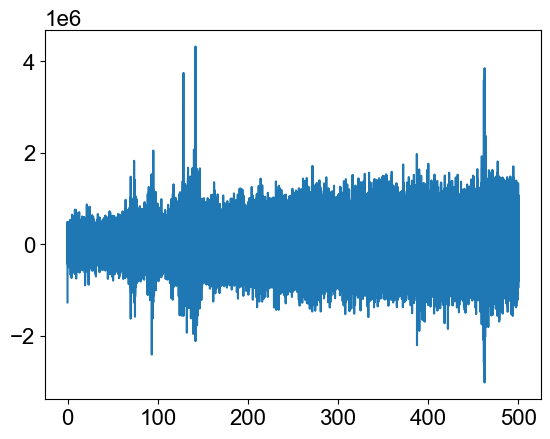

In [4]:
## 1D Spectrum
spec, f = spectrum(data[:, 300], fs, taper=0.05, nfft='default')
spec = spec[0]
print(spec.shape, f.shape, spec.max(), spec.min())

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(f, np.real(spec))
setAxis(ax)

(65537, 600) (65537,) (65020378.60833618-20396602.498112578j) (-54343507.33437974+13888235.409534883j)


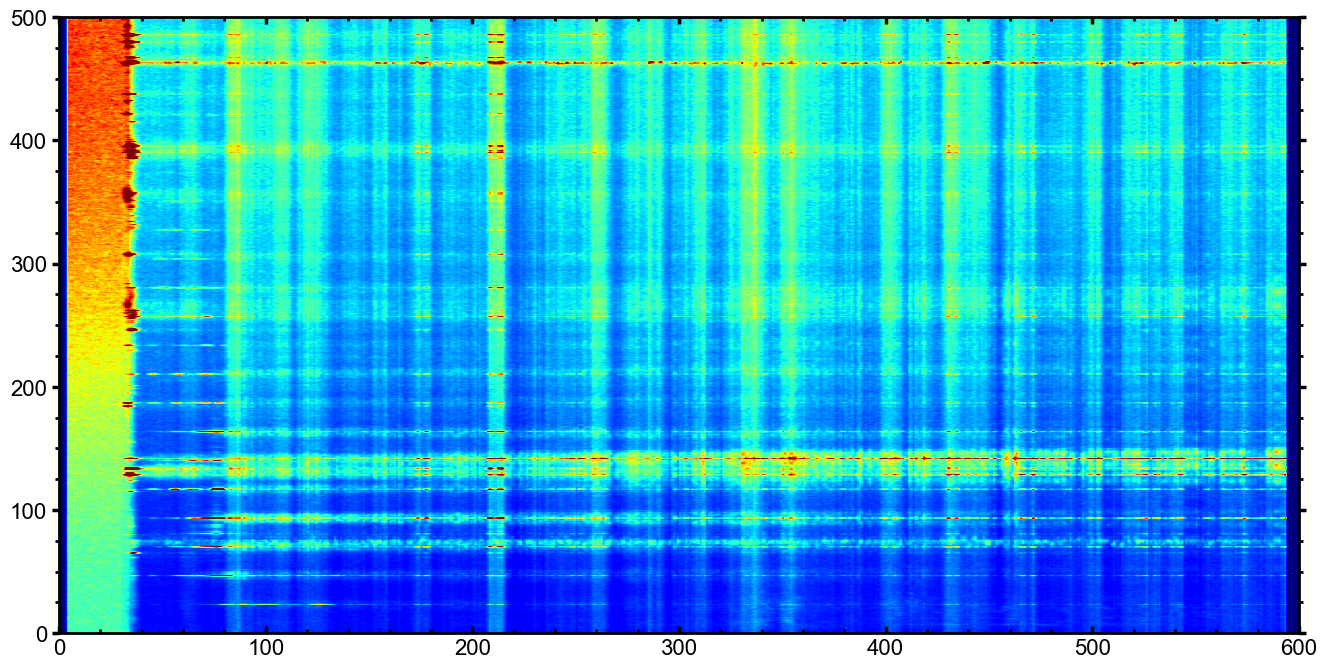

In [22]:
## 2D Spectrum
spec, f = spectrum(data.T, fs, taper=0.05, nfft='default')
spec = spec.T
print(spec.shape, f.shape, spec.max(), spec.min())

scale = 0.02
d_max = np.max(np.abs(spec))
d_min = np.min(np.abs(spec))
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(np.abs(spec), aspect='auto', origin='lower', cmap='jet',
           extent=[0, nx*dx, f[0], f[-1]], vmin=scale*d_min, vmax=scale*d_max)
setAxis(ax)

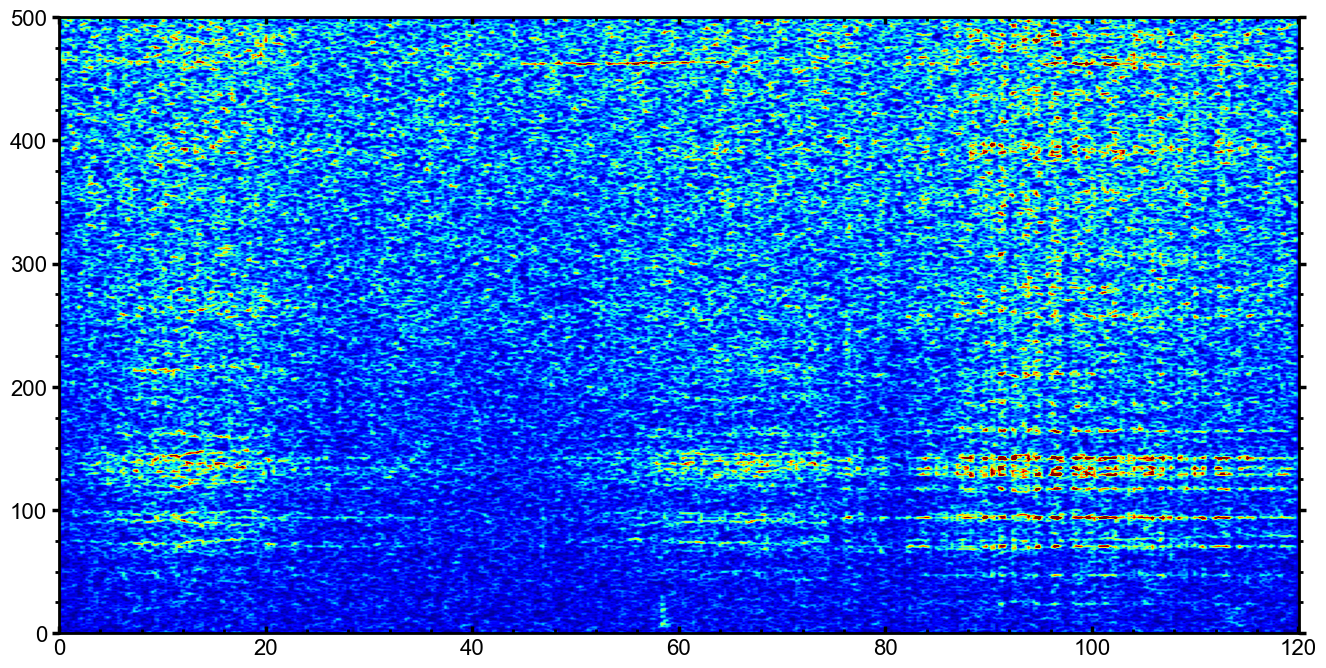

In [25]:
## 1D Spectrogram
Zxx, f, t = spectrogram(data[:, 200], fs, nperseg=1024, noverlap=768, nfft=2048, detrend=False,
                boundary='zeros')   # nperseg 控制时间和频率分辨率 Zxx(nf=nperseg, ntt=nt//nperseg)

scale = 0.4
d_max = np.max(np.abs(Zxx))
d_min = np.min(np.abs(Zxx))

fig, ax = plt.subplots(figsize=(16, 8)) 
ax.imshow(np.abs(Zxx), aspect='auto', origin='lower', cmap='jet',
           extent=[t[0], t[-1], f[0], f[-1]], vmin=scale*d_min, vmax=scale*d_max)
setAxis(ax)

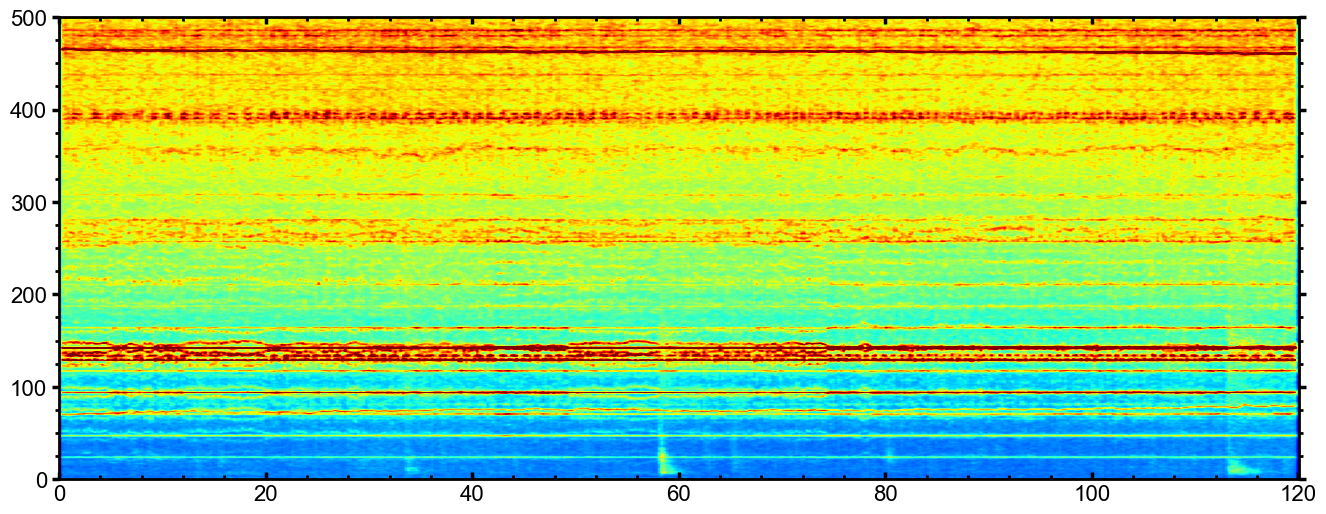

In [7]:
## 2D Spectrogram
Zxx, f, t = spectrogram(data.T, fs, nperseg=1024, noverlap=768, nfft=2048, detrend=False,
                boundary='zeros')   # nperseg 控制时间和频率分辨率 Zxx(nf=nperseg, ntt=nt//nperseg)

scale = 0.4
d_max = np.max(np.abs(Zxx))
d_min = np.min(np.abs(Zxx))

fig, ax = plt.subplots(figsize=(16, 6))
ax.imshow(np.abs(Zxx), aspect='auto', origin='lower', cmap='jet',
           extent=[t[0], t[-1], f[0], f[-1]], vmin=scale*d_min, vmax=scale*d_max)
setAxis(ax)

# A4Save(fig, 'spectrogram2D.pdf')


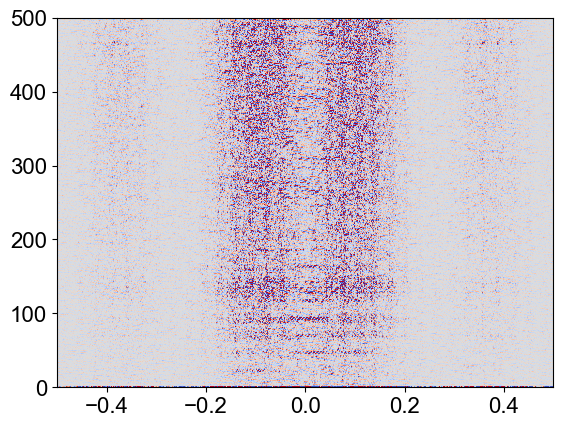

In [92]:
fk, f, k = fk_transform(data.T, dx, fs, taper=(0, 0.05), nfft='default')

scale = 0.00001
plt.imshow(np.real(fk.T), aspect='auto', origin='lower', cmap='coolwarm',
           extent=[k[0], k[-1], f[0], f[-1]], vmin=np.real(fk).min()*scale, vmax=np.real(fk).max()*scale)

## Filter

In [14]:
from dasQt.Process.basic_tools.filter import (
                bandpass, bandstop, lowpass,
                lowpass_cheby_2, highpass, envelope,
                median_filter2)

In [105]:
data_filtered = bandpass(data.T, fs, freqmin=0.1, freqmax=30, corners=4, 
             zerophase=True, detrend= False, taper= False)

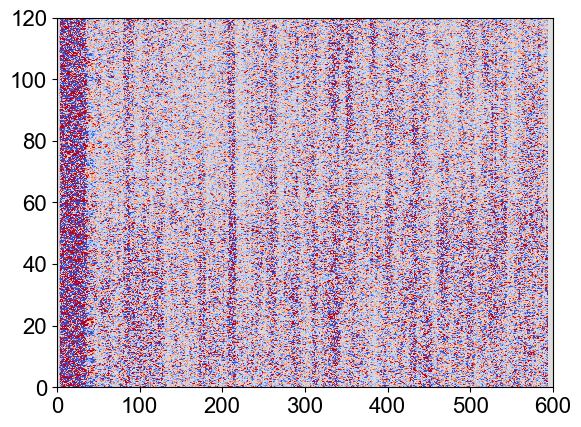

In [102]:
scale = 0.02
d_max = np.max(np.abs(data_filtered))
plt.imshow(data_filtered.T, aspect='auto', origin='lower', cmap='coolwarm',
           extent=[0, nx*dx, 0, nt*dt], vmin=-scale*d_max, vmax=scale*d_max)

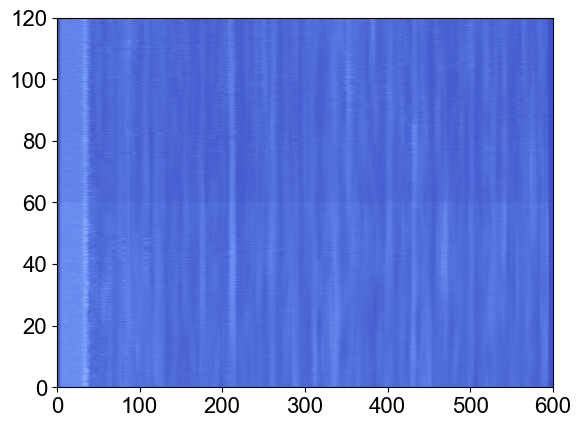

In [111]:
data_envelope = envelope(data.T)

scale = 0.8
d_max = np.max(np.abs(data_envelope))
d_min = np.min(np.abs(data_envelope))
plt.imshow(data_envelope.T, aspect='auto', origin='lower', cmap='coolwarm',
           extent=[0, nx*dx, 0, nt*dt], vmin=scale*d_min, vmax=scale*d_max)

In [17]:
data_median = median_filter2(data.T, nt=10, nx=10, threshold=1.8)


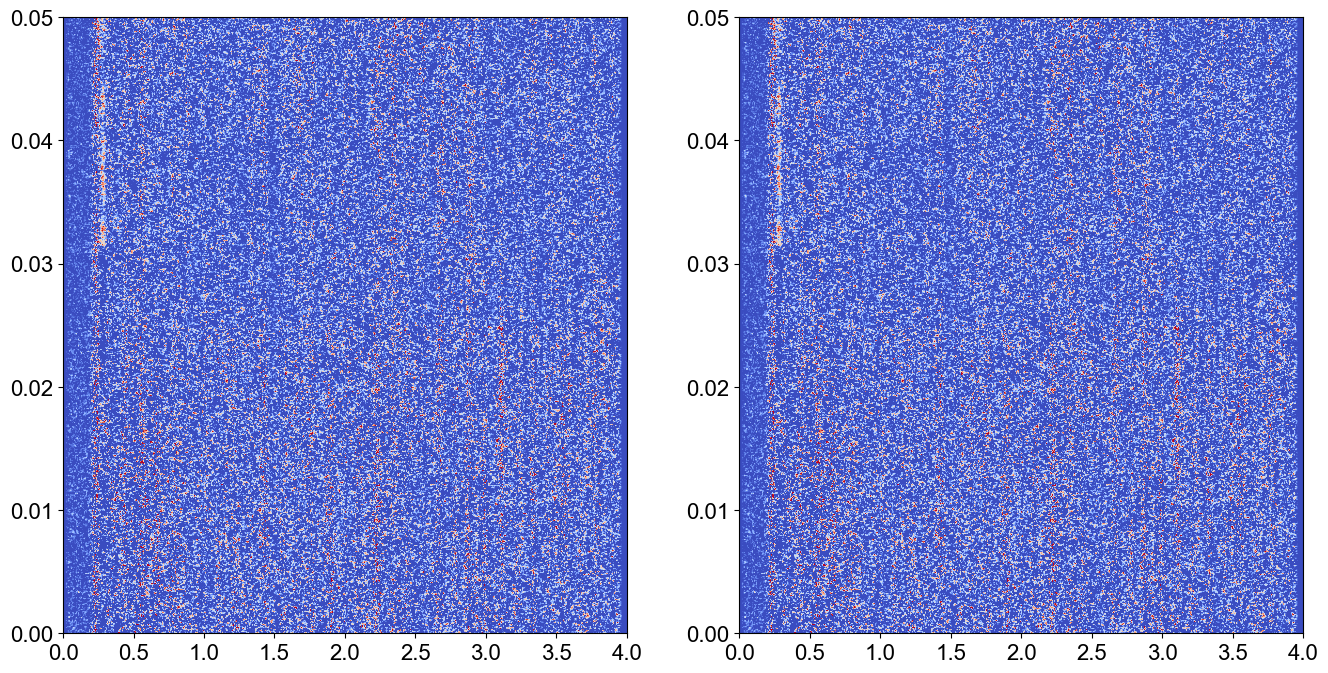

In [18]:

scale = 0.02
d_max = np.max(np.abs(data_median))
d_min = np.min(np.abs(data_median))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(data, aspect='auto', origin='lower', cmap='coolwarm',
           extent=[0, nx*dx, 0, nt*dt], vmin=scale*d_min, vmax=scale*d_max)
axes[1].imshow(data_median.T, aspect='auto', origin='lower', cmap='coolwarm',
           extent=[0, nx*dx, 0, nt*dt], vmin=scale*d_min, vmax=scale*d_max)

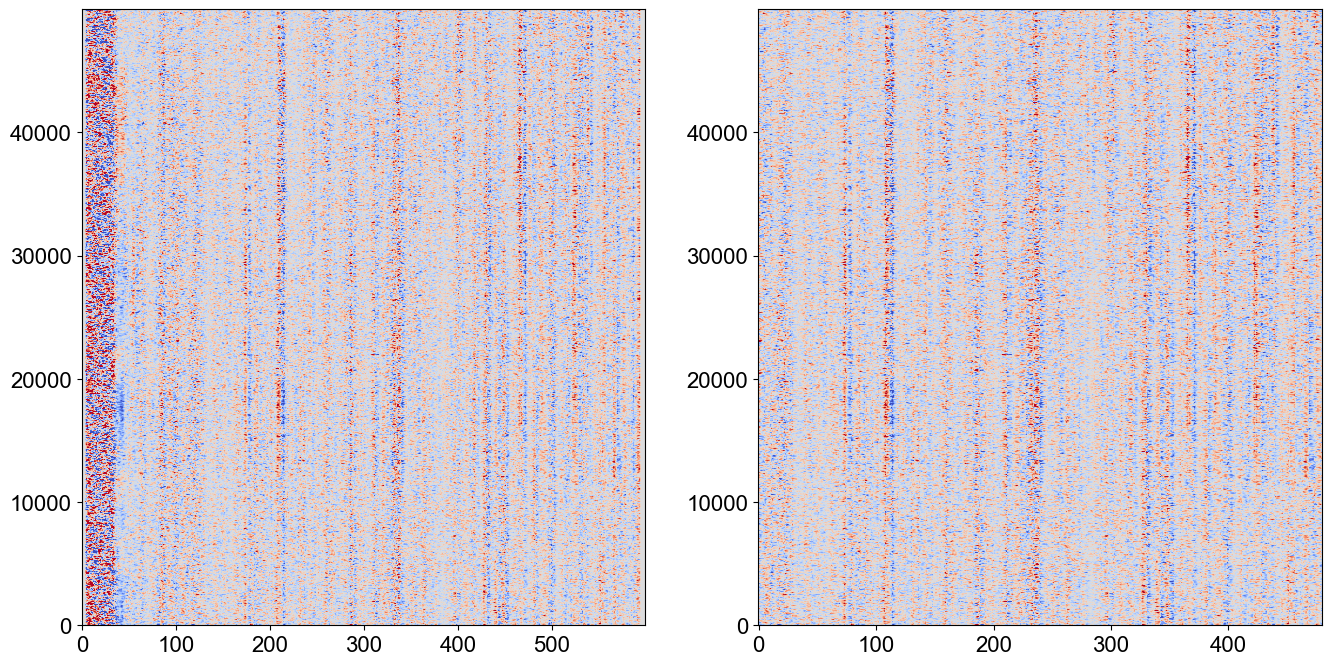

In [8]:
scale = 0.01
scale1 = 0.01
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(data[:50000], aspect='auto', cmap='coolwarm', origin='lower', vmin=-scale, vmax=scale)
axes[1].imshow(data6[:50000], aspect='auto', cmap='coolwarm', origin='lower', vmin=-scale1, vmax=scale1)